In [1]:
import os,sys
import pickle
import numpy as np                                       # fast vectors and matrices
from glob import glob
from time import time
import tensorflow as tf
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import shutil
from torch.utils.data import DataLoader
from torch import optim

import matplotlib.pyplot as plt                          # plotting
'''
from scipy.fftpack import fft
from sklearn.metrics import average_precision_score
'''
%matplotlib inline

In [2]:
sys.path.insert(0,'library\\')
import config
import diagnostics
import base_model   

Instructions for updating:
non-resource variables are not supported in the long term


## Data Loader

In [2]:
train_feat_path="processed_dataset\\train\\feat\\"
train_label_path="processed_dataset\\train\\label\\"
test_feat_path="processed_dataset\\test\\feat\\"
test_label_path="processed_dataset\\test\\label\\"

train_name=os.listdir(train_feat_path)
test_name=os.listdir(test_feat_path)

In [3]:
class CustomTrainDataset(Dataset):
    def __init__(self, feat_path=train_feat_path , label_path=train_label_path , transform=None, target_transform=None):
        self.img_labels = os.listdir(train_feat_path)
        self.feat_path = feat_path 
        self.label_path = label_path
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        data = (torch.from_numpy(np.load(self.feat_path +self.img_labels[idx])))
        label = (torch.from_numpy(np.load(self.label_path +self.img_labels[idx])))
        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

class CustomTestDataset(Dataset):
    def __init__(self, feat_path=test_feat_path , label_path=test_label_path , transform=None, target_transform=None):
        self.img_labels = os.listdir(train_feat_path)
        self.feat_path = feat_path 
        self.label_path = label_path
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        data = (torch.from_numpy(np.load(self.feat_path +self.img_labels[idx])))
        label = (torch.from_numpy(np.load(self.label_path +self.img_labels[idx])))
        print(self.feat_path +self.img_labels[idx])
        return data, label
    
    def demo() :
        for indices in train :
            yield collate_fn(train_dataset[i] for i in indices)


In [4]:
train_dataset=CustomTrainDataset()
test_dataset=CustomTrainDataset()

In [5]:
from torch.utils.data import DataLoader

train = DataLoader(train_dataset, batch_size=32, shuffle=True)
test = DataLoader(train_dataset, batch_size=32, shuffle=True)

## model

In [6]:
import torch
from torch import tensor
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from pathlib import Path
from IPython.core.debugger import set_trace
#from fastai import datasets
import pickle, gzip, math, torch
import operator

In [12]:
def normalize(x, m, s): 
    return (x-m)/s

In [14]:
class Model(nn.Module):
    # number of input feature, number of hidden feature, number of output feature
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        #self.fc = (32, 1500*120)
        #self.fc = (1500, 120)
        # data size = 32, 1500, 120
        #set_trace()
        self.layers = [nn.Linear(n_in, nh), nn.ReLU(), nn.Linear(nh, n_out)] 
        print(self.layers)       
    def __call__(self, x):
        for k in self.layers:
            x = k(x)
        return x

In [68]:
# loss function
loss_func = F.cross_entropy
'''
def accuracy(yhat, y):
    return (torch.argmax(yhat, dim=-1) == torch.argmax(y, dim=-1)).float().mean()
'''
#usinh mean sqrt error
def accuracy(yhat, y):
    precision=np.array([])
    for i in range(len(y)) :
        predictions=yhat[i].detach().numpy()
        true_values=y[i].detach().numpy()
        sq=np.sqrt(((predictions-true_values)**2).mean())
        precision=np.append(precision,sq)
        '''
        #N = true_values.shape[1]
        accuracy = (true_values == predictions).sum() / N
        TP = ((predictions == 1) & (true_values == 1)).sum()
        FP = ((predictions == 1) & (true_values == 0)).sum()
        np.append(precision,TP/(TP+FP))
        '''
        #print(TP/(TP+FP))
    return np.mean(precision)


1.860667858272791

In [105]:
from collections import Counter

In [124]:
def M_accuracy(yhat, y):
    precision=np.array([])
    for i in range(len(y)) :
        predictions=yhat[i].detach().numpy()
        true_values=y[i].detach().numpy()
        predictions=np.where(predictions <= 0.5, 0, 1)
        correct = (predictions == true_values)
        precision=np.append(precision,correct.mean().item())
    return np.mean(precision)

def M_loss_func():
    return 

acc = M_accuracy(preds, l)
acc

0.6214973958333333

In [109]:
acc = M_accuracy(preds, l)
acc

AttributeError: 'numpy.ndarray' object has no attribute 'int'

In [92]:
# batch size
bs = 32
# learning rate
epoch = 32
#lr = 0.03
lr = .001/3/3/3
nh = 50

In [93]:
d,l =next(iter(train))
c = l.max()
k, m=d[1].size()

In [47]:
model = Model(m, nh, l.size(dim=2)) #model = Model(120, nh, l.size(dim=2))
preds = model(d)

[Linear(in_features=120, out_features=50, bias=True), ReLU(), Linear(in_features=50, out_features=88, bias=True)]


In [90]:
loss = loss_func(preds, l)
acc = M_accuracy(preds, l)
loss , acc

TypeError: cross_entropy_loss(): argument 'target' (position 2) must be Tensor, not Linear

In [ ]:
preds[0], l[0]

## loop

In [28]:
batch = 32
train = DataLoader(train_dataset, batch_size=batch, shuffle=True)

losses, metrics = [], []
epoch = train.__len__()

batch	loss	acc.


In [ ]:
from torch.utils.data import DataLoader
train = DataLoader(train_dataset, batch_size=batch, shuffle=True)
epoch = train.__len__()

In [129]:
print("batch\tloss\tacc.")
#optimizer=optim.SGD([loss, acc], lr=0.1)

for e in range(0,10) :
    # b = batch number
    #for b in range((n-1)//bs + 1):
    for b in range(0,batch):
        # Feedforward
        xb,yb =next(iter(train))
        yhatb = model(xb)
        loss = loss_func(yhatb, yb)
        Optimizer = optim.SGD([xb, yb], lr=0.1)

        # Metrics
        acc = M_accuracy(yhatb, yb)
        losses.append(loss); metrics.append(acc)
        
        # Backpropagation
        loss.backward()
        '''
        Optimizer.step()
        Optimizer.zero_grad(set_to_none=False)
        '''

        # Update Wight and Bias with SGD
        with torch.no_grad():
            for l in model.layers:
                if hasattr(l, 'weight'):
                    l.weight -= l.weight.grad * lr
                    l.bias   -= l.bias.grad * lr 
                    l.weight.grad.zero_()
                    l.weight.step()
                    l.bias.grad.zero_()
                    l.bias.step()
                    

    
    print(e,"\t",loss,"\t",acc)

batch	loss	acc.
0 	 tensor(408.9779, grad_fn=<DivBackward1>) 	 0.6983274147727272
1 	 tensor(368.8148, grad_fn=<DivBackward1>) 	 0.6946432291666667
2 	 tensor(358.7202, grad_fn=<DivBackward1>) 	 0.696170928030303
3 	 tensor(385.0581, grad_fn=<DivBackward1>) 	 0.6972462121212122
4 	 tensor(381.0847, grad_fn=<DivBackward1>) 	 0.6990250946969696
5 	 tensor(387.1973, grad_fn=<DivBackward1>) 	 0.6975094696969697
6 	 tensor(359.7737, grad_fn=<DivBackward1>) 	 0.7096268939393939
7 	 tensor(366.9465, grad_fn=<DivBackward1>) 	 0.700819365530303
8 	 tensor(340.3318, grad_fn=<DivBackward1>) 	 0.7010016571969697
9 	 tensor(378.0589, grad_fn=<DivBackward1>) 	 0.6994777462121211
10 	 tensor(376.0557, grad_fn=<DivBackward1>) 	 0.7065407196969697
11 	 tensor(395.8561, grad_fn=<DivBackward1>) 	 0.7049053030303031
12 	 tensor(369.6150, grad_fn=<DivBackward1>) 	 0.7028357007575758
13 	 tensor(352.0243, grad_fn=<DivBackward1>) 	 0.7068231534090909
14 	 tensor(405.3780, grad_fn=<DivBackward1>) 	 0.70034351

In [130]:
type(metrics[0])

numpy.float64

In [131]:
temp_l, temp_acc=[],[]
for k in losses :
    temp_l.append(k.detach())
    #temp_l.append(k)

for k in metrics :
    #temp_acc.append(k.detach())
    temp_acc.append(k)

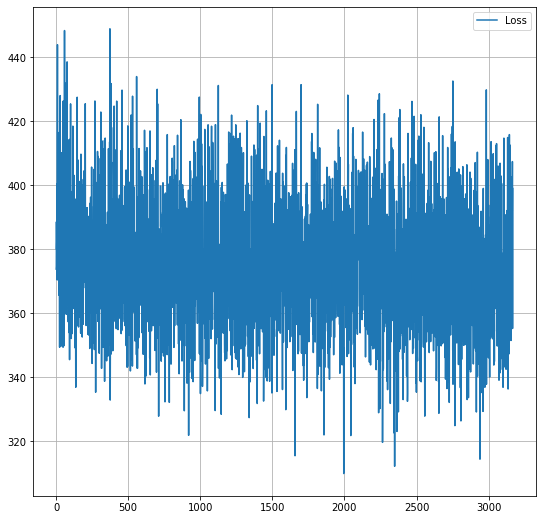

In [132]:
x = torch.arange(len(losses)).numpy()
fig,ax = plt.subplots(figsize=(9, 9))
ax.grid(True)
ax.plot(x, temp_l, label="Loss")
ax.legend(loc='upper right')

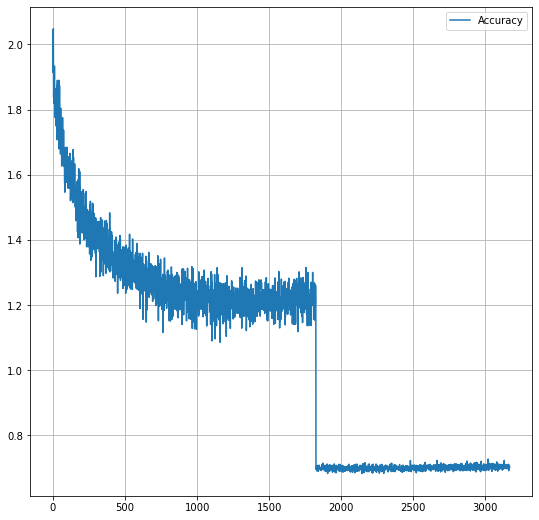

In [133]:
x = torch.arange(len(losses)).numpy()
fig,ax = plt.subplots(figsize=(9, 9))
ax.grid(True)
ax.plot(x, temp_acc, label="Accuracy")
ax.legend(loc='upper right')

In [134]:
loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(398.9960, grad_fn=<DivBackward1>), 1.3234760593622923)

## lookup

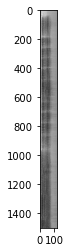

In [44]:
import matplotlib.pyplot as plt
plt.imshow(d[10], cmap=plt.cm.binary)

In [45]:
print(l[10])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
